In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import norm

In [14]:
dfmain = pd.read_csv('/content/META.csv')
df = dfmain
dfmain.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-03,194.550003,195.399994,192.520004,192.729996,192.729996,13489500
1,2018-07-05,194.740005,198.649994,194.029999,198.449997,198.449997,19684200
2,2018-07-06,198.449997,203.639999,197.699997,203.229996,203.229996,19740100
3,2018-07-09,204.929993,205.800003,202.119995,204.740005,204.740005,18149400
4,2018-07-10,204.500000,204.910004,202.259995,203.539993,203.539993,13190100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([736876., 736938., 736999., 737060., 737119., 737180., 737241.]),
 <a list of 7 Text major ticklabel objects>)

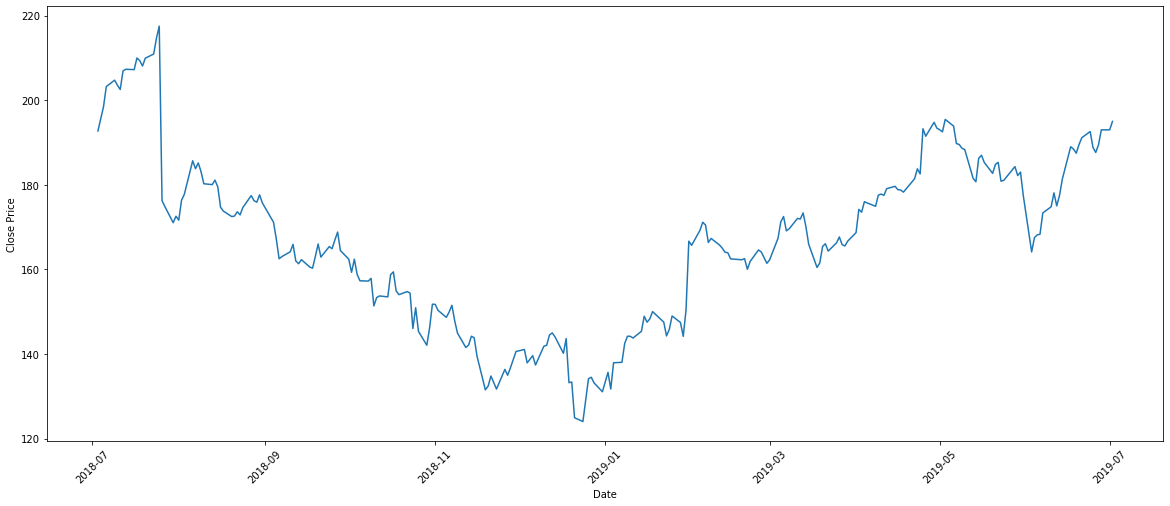

In [18]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [19]:
df['Daily Lag'] = df['Close'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,2018-07-03,194.550003,195.399994,192.520004,192.729996,192.729996,13489500,NaN
1,2018-07-05,194.740005,198.649994,194.029999,198.449997,198.449997,19684200,192.729996
2,2018-07-06,198.449997,203.639999,197.699997,203.229996,203.229996,19740100,198.449997
3,2018-07-09,204.929993,205.800003,202.119995,204.740005,204.740005,18149400,203.229996
4,2018-07-10,204.500000,204.910004,202.259995,203.539993,203.539993,13190100,204.740005


In [20]:
df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2018-07-03,194.550003,195.399994,192.520004,192.729996,192.729996,13489500,NaN,NaN
1,2018-07-05,194.740005,198.649994,194.029999,198.449997,198.449997,19684200,192.729996,-0.028823
2,2018-07-06,198.449997,203.639999,197.699997,203.229996,203.229996,19740100,198.449997,-0.023520
3,2018-07-09,204.929993,205.800003,202.119995,204.740005,204.740005,18149400,203.229996,-0.007375
4,2018-07-10,204.500000,204.910004,202.259995,203.539993,203.539993,13190100,204.740005,0.005896


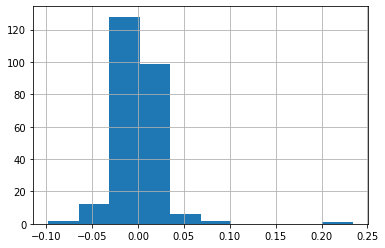

In [21]:
df['Daily Returns'].hist()

In [22]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 0.0002642970399357725
Std deviation = 0.025556859896707987


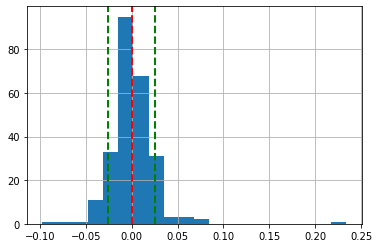

In [23]:
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [24]:
df['Daily Returns'].kurtosis()

28.7369773487353

In [35]:
otherdf = dfmain[['Date', 'Close']]
otherdf.head()

,Date,Close
0,2018-07-03,192.729996
1,2018-07-05,198.449997
2,2018-07-06,203.229996
3,2018-07-09,204.740005
4,2018-07-10,203.539993


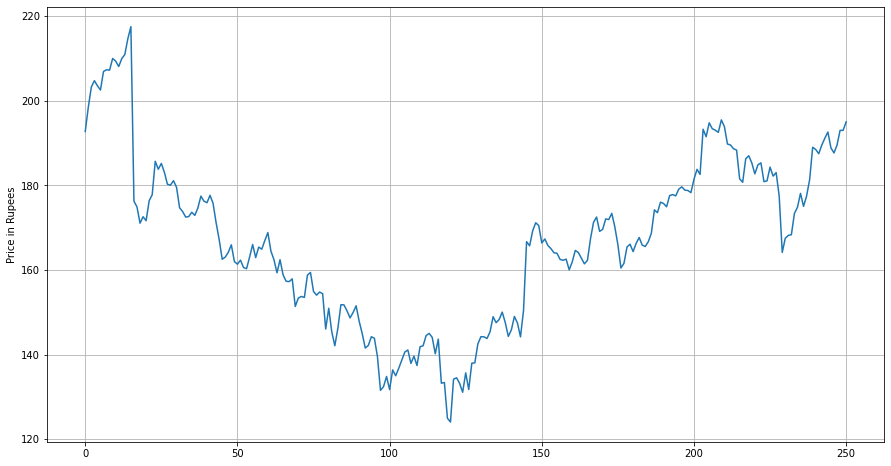

In [36]:
otherdf['Close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in Rupees")
plt.show()

In [38]:
# create 20 days simple moving average column
otherdf['20_SMA'] = otherdf['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
otherdf['50_SMA'] = otherdf['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
otherdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Close,20_SMA,50_SMA
0,2018-07-03,192.729996,192.729996,192.729996
1,2018-07-05,198.449997,195.589996,195.589996
2,2018-07-06,203.229996,198.136663,198.136663
3,2018-07-09,204.740005,199.787498,199.787498
4,2018-07-10,203.539993,200.537997,200.537997


In [40]:
otherdf['Signal'] = 0.0
otherdf['Signal'] = np.where(otherdf['20_SMA'] > otherdf['50_SMA'], 1.0, 0.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
otherdf['Position'] = otherdf['Signal'].diff()
# display first few rows
otherdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,20_SMA,50_SMA,Signal,Position
0,2018-07-03,192.729996,192.729996,192.729996,0.0,NaN
1,2018-07-05,198.449997,195.589996,195.589996,0.0,0.0
2,2018-07-06,203.229996,198.136663,198.136663,0.0,0.0
3,2018-07-09,204.740005,199.787498,199.787498,0.0,0.0
4,2018-07-10,203.539993,200.537997,200.537997,0.0,0.0


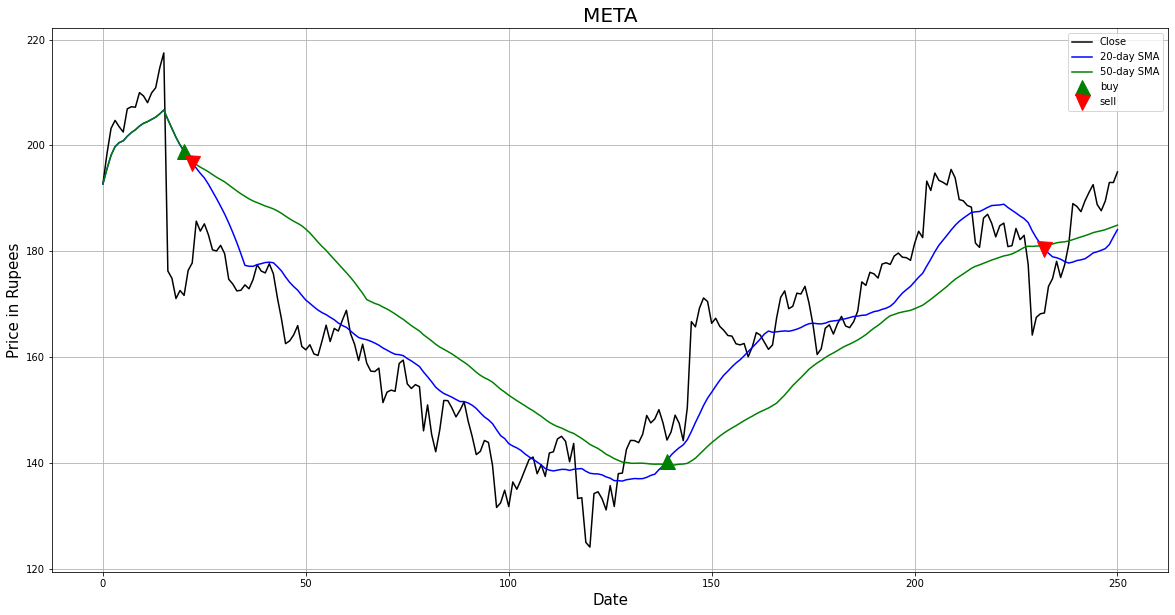

In [44]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
otherdf['Close'].plot(color = 'k', label= 'Close') 
otherdf['20_SMA'].plot(color = 'b',label = '20-day SMA') 
otherdf['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(otherdf[otherdf['Position'] == 1].index, 
         otherdf['20_SMA'][otherdf['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(otherdf[otherdf['Position'] == -1].index, 
         otherdf['20_SMA'][otherdf['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('META', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [45]:
emadf = dfmain[['Date', 'Close']]
emadf.head()

,Date,Close
0,2018-07-03,192.729996
1,2018-07-05,198.449997
2,2018-07-06,203.229996
3,2018-07-09,204.740005
4,2018-07-10,203.539993


In [47]:
emadf['20_EMA'] = emadf['Close'].ewm(span = 20, adjust = False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
emadf['50_EMA'] = emadf['Close'].ewm(span = 50, adjust = False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
emadf['Signal'] = 0.0  
emadf['Signal'] = np.where(emadf['20_EMA'] > emadf['50_EMA'], 1.0, 0.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
emadf['Position'] = emadf['Signal'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


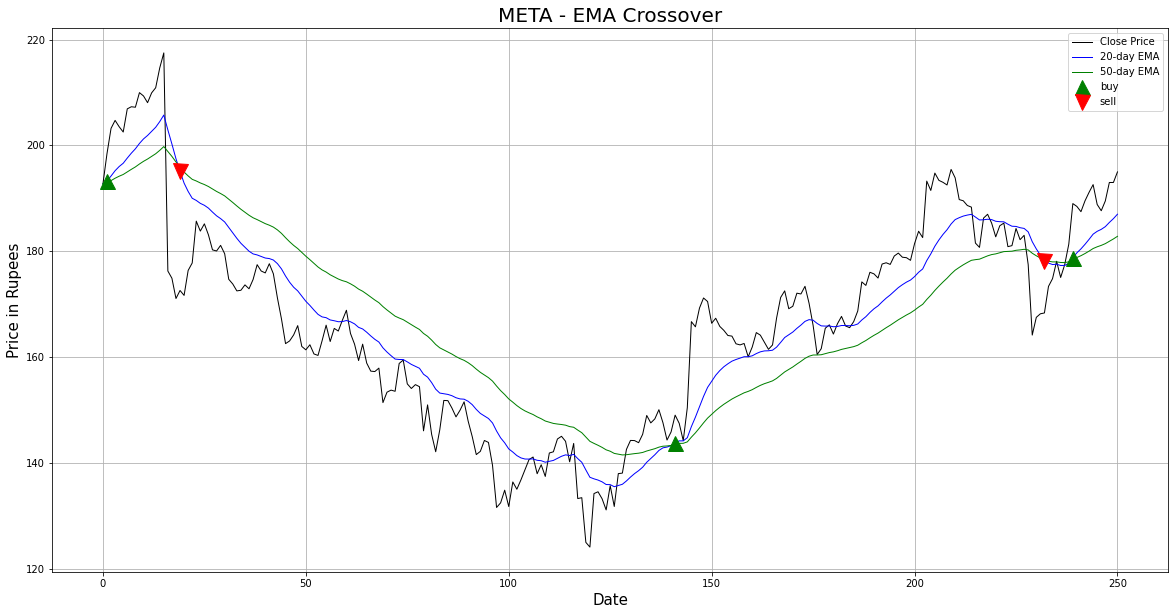

In [52]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
emadf['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
emadf['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
emadf['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(emadf[emadf['Position'] ==  1].index,emadf['20_EMA'][emadf['Position'] ==  1],'^', markersize = 15, color = 'g', label = 'buy')
plt.plot(emadf[emadf['Position'] == -1].index,emadf['20_EMA'][emadf['Position'] == -1],'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('META - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()